<h1 style="color:white; background-color: #ADD8E6; padding:15px; text-align: center;">
Projet Machine Learning - Graphique
</h1> 

## Bibliothèques

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import missingno as msno
import configparser

## Ouverture et Etude des Données

In [2]:
data_train = pd.read_csv("train.csv")

data_test = pd.read_csv("test.csv")

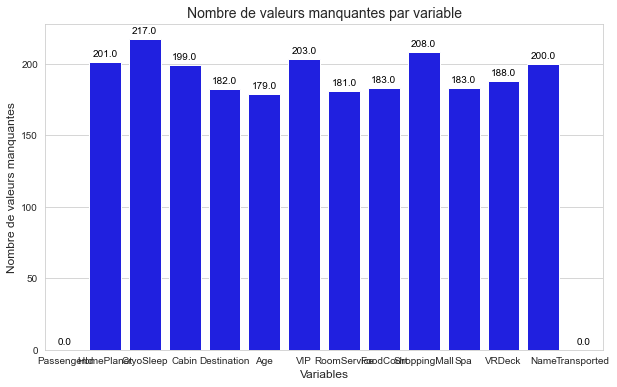

In [13]:
# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data_train.isnull().sum()

# Créer un graphique à barres avec seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=missing_values.index, y=missing_values.values, color='blue')

# Ajouter une étiquette pour l'axe des x
plt.xlabel("Variables", fontsize=12)

# Ajouter une étiquette pour l'axe des y
plt.ylabel("Nombre de valeurs manquantes", fontsize=12)

# Ajouter un titre
plt.title("Nombre de valeurs manquantes par variable", fontsize=14)

# Ajouter la valeur de chaque barre
for bar in barplot.patches:
    plt.annotate(format(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points', fontsize=10, color='black')

# Afficher le graphique
plt.show()


In [7]:
display(data_train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


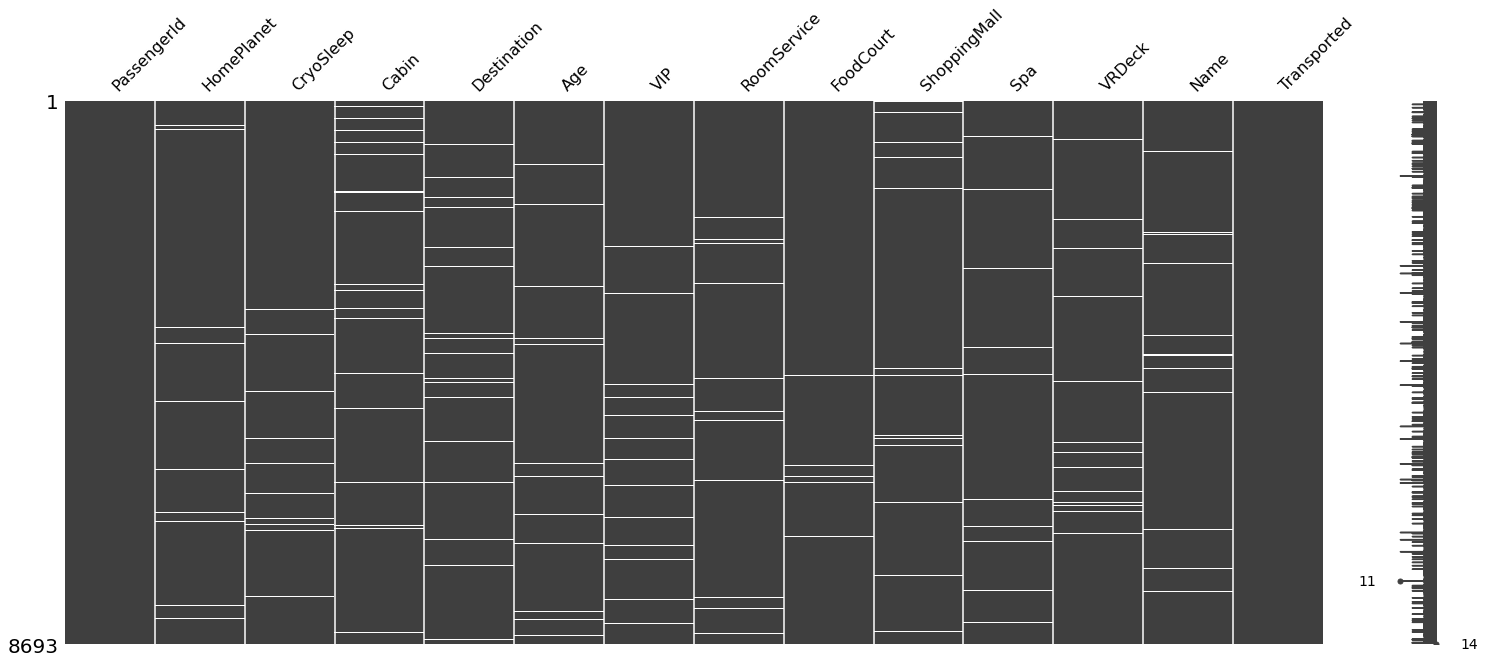

In [5]:
msno.matrix(data_train)
plt.show()

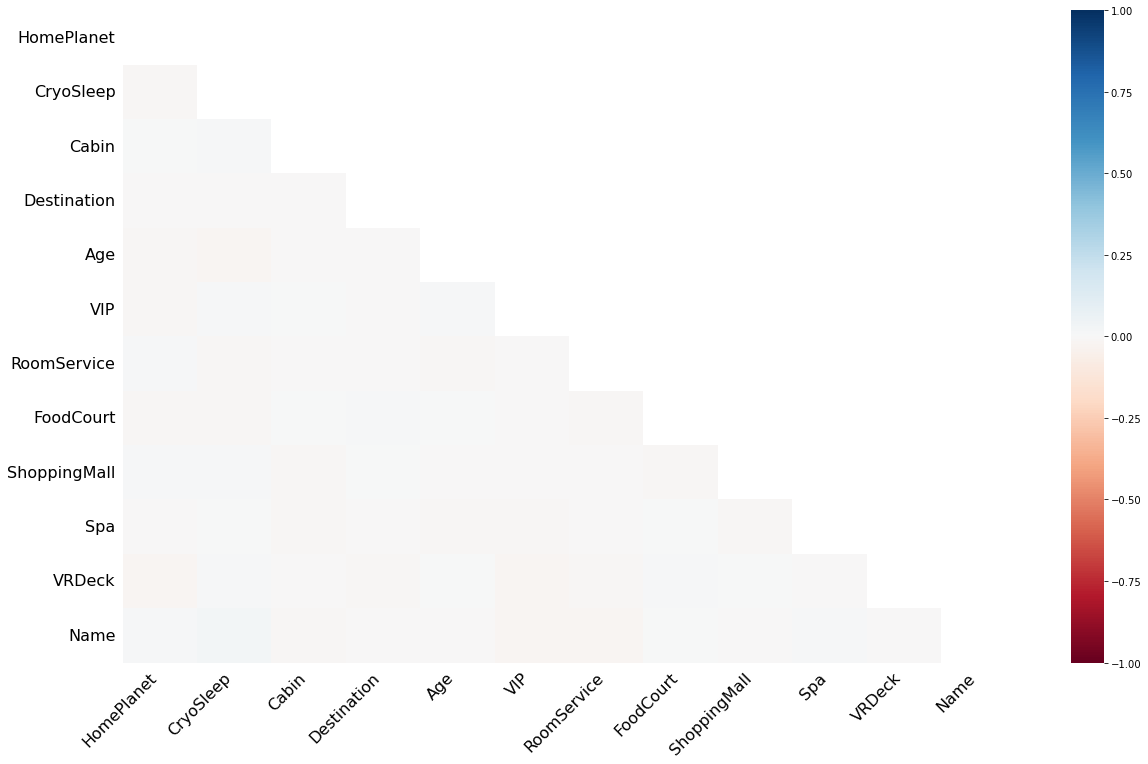

In [6]:
# correlation map of missing features
msno.heatmap(data_train)
plt.show()
# The visualizations show that there does not appear to be any correlation among the missing features, indicating that they are missing at random.

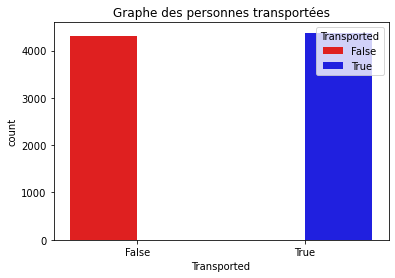

In [7]:
sns.countplot(x=data_train['Transported'], hue = data_train['Transported'] ,orient='h', palette=['red', 'blue'])
plt.title('Graphe des personnes transportées')
plt.show()

On peut voir que la moitié des passagers est transporté et l'autre moitié ne l'est pas. \
On va maintenant extraire le groupe de chaque passager et ensuite compter le nombre de passagers présents par groupe.

In [8]:
data_train['Passenger_group'] = data_train['PassengerId'].apply(lambda x : x.split('_')[0]).astype(str)
data_test['Passenger_group'] = data_test['PassengerId'].apply(lambda x : x.split('_')[0]).astype(str)
unique_group = data_train['Passenger_group'].nunique()
#6217

data_train['Group_Size'] = data_train['Passenger_group'].map(lambda x: pd.concat([data_train['Passenger_group'], data_test['Passenger_group']]).value_counts()[x])

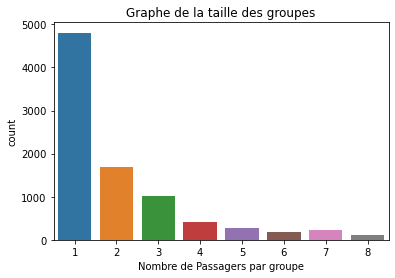

In [9]:
sns.countplot(x=data_train['Group_Size'],orient='h')
plt.title('Graphe de la taille des groupes')
plt.xlabel('Nombre de Passagers par groupe')
plt.show()

Nombre de passagers par groupe 

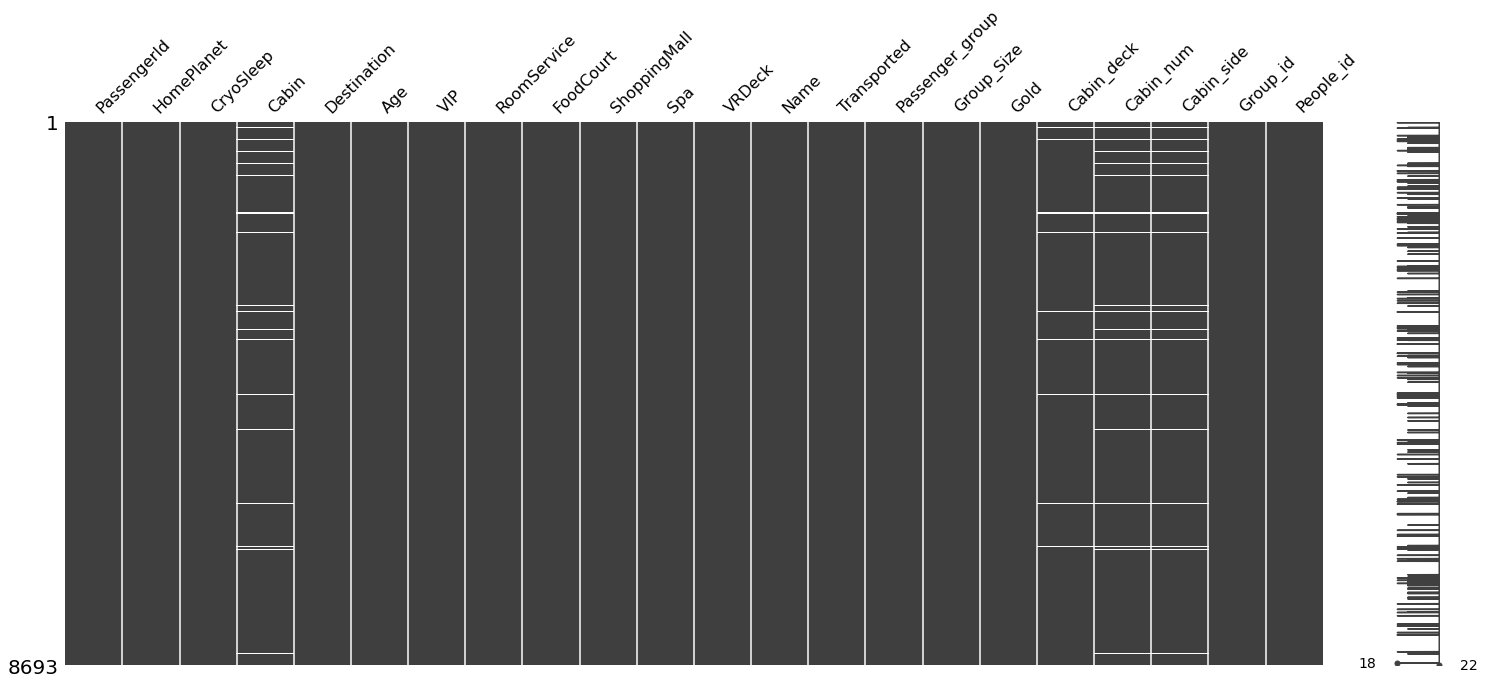

In [19]:
df = data_train.copy(deep=True)
col_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']

df['Gold'] = df[col_list].sum(axis = 1)

df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df.Cabin.str.split("/", expand=True)
df[['Group_id', 'People_id']] = df.PassengerId.str.split("_", expand = True)
# Pour l'age on va ajouter la moyenne de l'age dans chaque NA 
moy_age = df.Age.mean()
df.Age.fillna(moy_age, inplace = True)

#On ajoute juste un nom 'Inconnu' a chaque valeur manquante
df.Name.fillna('Inconnu', inplace=True)

#People in a group have the same HomePlanet
#link between HomePlanet and CabinDeck:
#Earth on E, F,G
#Mars on D, E, F
#Europa on A, B, C, D, E, T 
def fill_home_planet(row):
    if row.Cabin_deck == "E":
        return "Earth"
    if row.Cabin_deck == "D":
        return "Mars"
    if row.Cabin_deck == "A" or row.Cabin_deck == "B" or row.Cabin_deck == "C" or row.Cabin_deck == "T":
        return "Europa"
    return row.HomePlanet

df.HomePlanet = df.apply(fill_home_planet, axis=1)

#People not Children and not CryoSleep with no bill all have Destination TRAPPIST-1e
#People under 25 and coming from europa are NOT going to PSO ...
def fill_destination(row) : 
    if row.Age >= 12  and  row.CryoSleep == False and row.Gold == 0 : 
        return "TRAPPIST-1e"
    if row.HomePlanet == 'Europa' and row.Age < 25 : 
        return "TRAPPIST-1e"
    return row.Destination

df.Destination = df.apply(fill_destination, axis=1)

#On regarde les différentes colonnes contenant des informations sur les dépenses effectuées au cours du voyage
#Si la personne est cryogénisé alors on sait qu il ne va rien dépenser
#Si la personnes en question a moins de 12 ans alors on sait qu'il ne peut pas dépenser d'argent et ainsi on remplit la case correspondante avec un 0.
def fill_RoomService(row) : 
    if row.Age <= 12 and pd.isnull(row.RoomService) : 
        return 0
    if row.CryoSleep == True :
        return 0
    return row.RoomService 
df.RoomService = df.apply(fill_RoomService, axis=1)

def fill_ShoppingMall(row) : 
    if row.Age <= 12 and pd.isnull(row.ShoppingMall) :
        return 0 
    if row.CryoSleep == True :
        return 0
    return row.ShoppingMall
df.ShoppingMall = df.apply(fill_ShoppingMall, axis=1)

def fill_FoodCourt(row) : 
    if row.Age <= 12 and pd.isnull(row.FoodCourt) :
        return 0 
    if row.FoodCourt == True :
        return 0
    return row.FoodCourt
df.FoodCourt = df.apply(fill_FoodCourt, axis = 1)

def fill_Spa(row) : 
    if row.Age <= 12 and pd.isnull(row.Spa) :
        return 0
    if row.CryoSleep == True :
        return 0
    return row.Spa
df.Spa = df.apply(fill_Spa, axis = 1)

def fill_VRDeck(row) :
    if row.Age <= 12 and pd.isnull(row.VRDeck) :
        return 0
    if row.CryoSleep == True :
        return 0
    return row.VRDeck
df.VRDeck = df.apply(fill_VRDeck, axis = 1)

#in groups with several CabinDeck, people with no bill are necessarily on CabinDeck:
#Earth on G
#Europa on B
#Mars on E or F
def fill_deck(row) : 
    if row.Gold == 0 and row.HomePlanet == 'Earth' : 
        return "G"
    if row.Gold == 0 and row.HomePlanet == 'Europa' : 
        return "B"
    if row.Gold == 0 and row.HomePlanet == 'Mars' : 
        return "E"
    return row.Cabin_deck
df.Cabin_deck = df.apply(fill_deck, axis = 1)

#Earth has no VIP 
def fill_VIP(row) : 
    if row.HomePlanet == 'Earth' : 
        return False 
    return row.VIP
df.VIP = df.apply(fill_VIP, axis = 1)

df['CryoSleep'] = LabelEncoder().fit_transform(df['CryoSleep'])
df['VIP'] = LabelEncoder().fit_transform(df['VIP'])
df['Transported'] = LabelEncoder().fit_transform(df['Transported'])

df['HomePlanet'].fillna('Europa', inplace = True)
df['RoomService'].fillna(0, inplace = True)
df['FoodCourt'].fillna(0, inplace = True)
df['ShoppingMall'].fillna(0, inplace = True)
df['Spa'].fillna(0, inplace = True)
df['VRDeck'].fillna(0, inplace = True)
df['Destination'].fillna("TRAPPIST-1e", inplace = True)

msno.matrix(df)
plt.show()